<a href="https://colab.research.google.com/github/Renanvictordiascosta/Atividade-Avaliativa-CNA/blob/main/UniD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

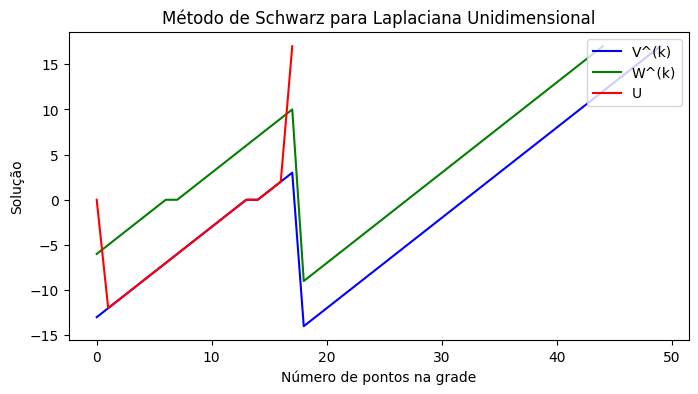

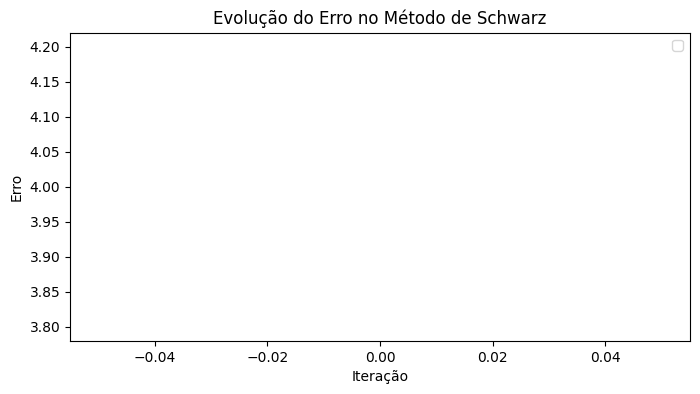

In [3]:
# Bibliotecas utilizadas
import numpy as np
import matplotlib.pyplot as plot

# Condições propostas que serão inseridas na função
n = 18
iteracoes = 5
tolerancia = 2

# Função para calculo do método de Schwarz
def schwarz(n, iteracoes, tolerancia):

  V = np.arange(n - 50, n, 1)
  W = np.arange(n - 45, n, 1)
  U = np.arange(n - 18, n, 1)
  erros = []

  plot.figure(figsize=(8, 4))
  plot.xlabel("Número de pontos na grade")
  plot.ylabel("Solução")
  plot.title("Método de Schwarz para Laplaciana Unidimensional")

  # Iterações do método de Schwarz
  for k in range(iteracoes):

      for i in range(n):
          V[i] = 0.5 * (W[i] + U[i])

      for i in range(n):
          W[i] = 0.5 * (V[i] + U[i])

      for i in range(1, n - 1):
          U[i] = 0.5 * (V[i - 1] + V[i + 1])

      # Calcular os erros
      erro = np.linalg.norm(U[i] + V[i])
      erros.append(erro)

      # Critério de parada
      if np.linalg.norm(U[i] - V[i]) < tolerancia:
        break

  # Plotar as soluções em cores diferentes
  plot.plot(V, color="blue", label="V^(k)")
  plot.plot(W, color="green", label="W^(k)")
  plot.plot(U, color="red", label="U")
  plot.legend(loc="upper right")

  # Plotar a evolução dos erros
  plot.figure(figsize=(8, 4))
  plot.plot(erros)
  plot.xlabel("Iteração")
  plot.ylabel("Erro")
  plot.title("Evolução do Erro no Método de Schwarz")
  plot.legend()

# Execução da função com método de Schwarz
schwarz(n, iteracoes, tolerancia)

plot.show()

Região de Sobreposição: 5
Número de Iterações: 1
Tempo de Cálculo: 0.0003616809844970703 segundos

Região de Sobreposição: 10
Número de Iterações: 1
Tempo de Cálculo: 0.0002989768981933594 segundos

Região de Sobreposição: 15
Número de Iterações: 1
Tempo de Cálculo: 0.00030732154846191406 segundos

Região de Sobreposição: 20
Número de Iterações: 1
Tempo de Cálculo: 0.00030875205993652344 segundos



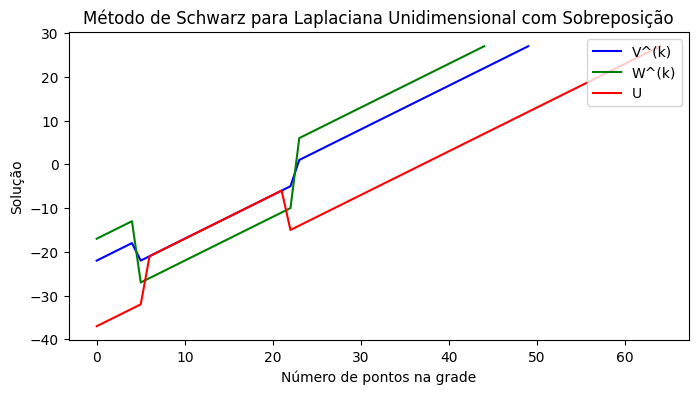

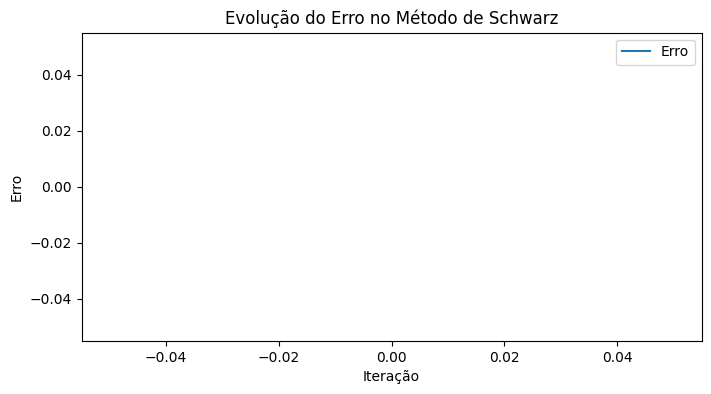

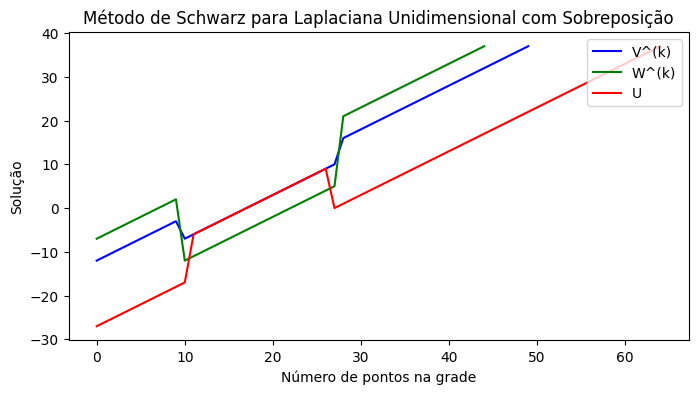

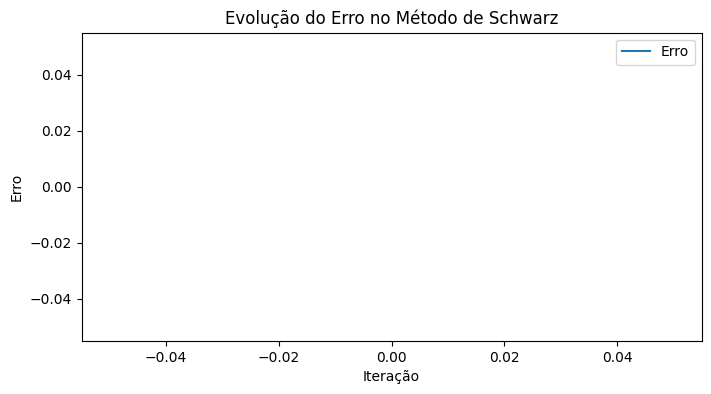

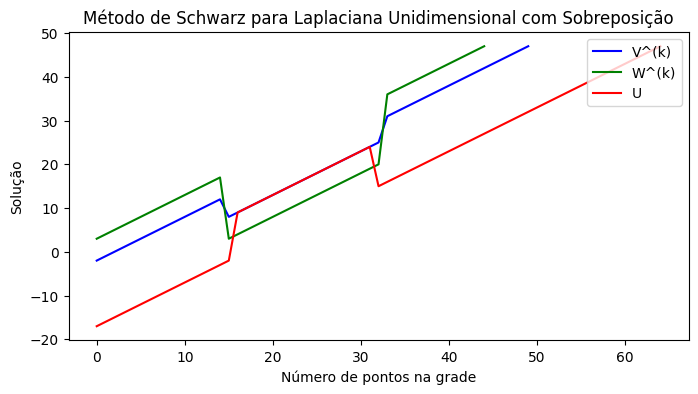

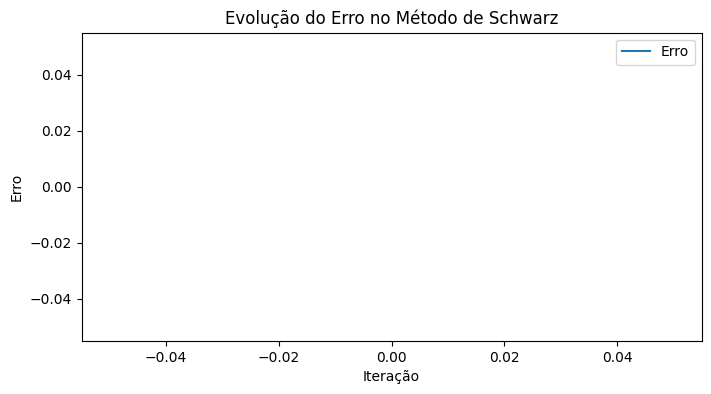

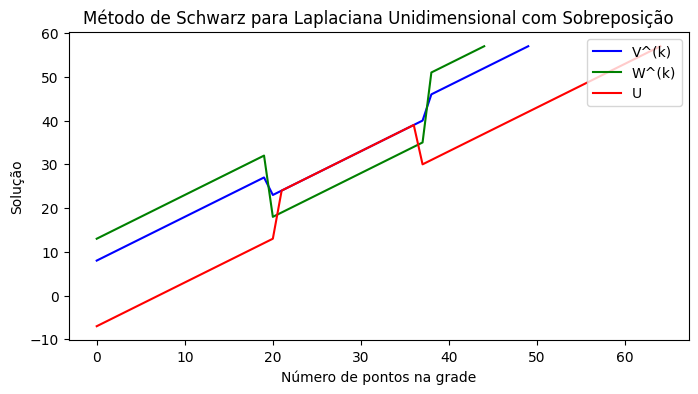

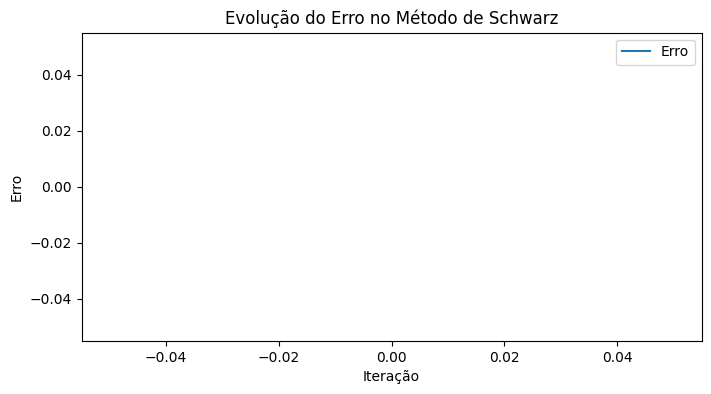

In [4]:
# Bibliotecas usadas
import numpy as np
import matplotlib.pyplot as plot
import time

# Função que realiza o cálculo com as sobreposições
def schwarz(n_inicial, iteracao, tolerancia, tamanho_overlap):

    n = n_inicial + 2 * tamanho_overlap
    il = tamanho_overlap
    ir = n - tamanho_overlap

    V = np.arange(n - 50, n, 1)
    W = np.arange(n - 45, n, 1)
    U = np.arange(n - 65, n, 1)
    erros = []

    # Iterações do método de Schwarz
    inicio_tempo = time.time()
    for k in range(iteracao):

        for i in range(il, ir):
            V[i] = 0.5 * (W[i] + U[i])


        for i in range(il, ir):
            W[i] = 0.5 * (V[i] + U[i])

        for i in range(il + 1, ir - 1):
            U[i] = 0.5 * (V[i - 1] + V[i + 1])

        # Calcular os erros
        erro = np.linalg.norm(U[i] - V[i])
        erros.append(erro)

        # Critério de parada
        if erro < tolerancia:
            break

    # Tempo de cálculo
    fim_tempo = time.time()
    tempo_computacao = fim_tempo - inicio_tempo

    # Número de iterações
    numero_iteracao = k + 1

    # Plotagem das soluções em cores distintas
    plot.figure(figsize=(8, 4))
    plot.plot(V, color="blue", label="V^(k)")
    plot.plot(W, color="green", label="W^(k)")
    plot.plot(U, color="red", label="U")
    plot.legend(loc="upper right")
    plot.xlabel("Número de pontos na grade")
    plot.ylabel("Solução")
    plot.title("Método de Schwarz para Laplaciana Unidimensional com Sobreposição")

    # Plotar a evolução dos erros
    plot.figure(figsize=(8, 4))
    plot.plot(erros, label="Erro")
    plot.xlabel("Iteração")
    plot.ylabel("Erro")
    plot.title("Evolução do Erro no Método de Schwarz")
    plot.legend()

    return numero_iteracao, tempo_computacao

# Teste da função de sobreposições
n_inicial = 18
iteracao = 5
tolerancia = 1
tamanho_overlaps = [5, 10, 15, 20]
plot.show()

# Administrador de resultados e atribuição de valores gerados em função, com
# base nas regiôes de sobreposição
for tamanho_overlap in tamanho_overlaps:
    numero_iteracao, tempo_computacao = schwarz(n_inicial, iteracao, tolerancia, tamanho_overlap)
    print("Região de Sobreposição:", tamanho_overlap)
    print("Número de Iterações:", numero_iteracao)
    print("Tempo de Cálculo:", tempo_computacao, "segundos")
    print()